# importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline
import seaborn as sns
from matplotlib import cm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,classification_report,roc_auc_score

# exploratory data analysis

In [4]:
labels = ['G protein coupled receptors','Tyrosine kinase','Tyrosine phosphatase','Synthetase','Synthase','Ion channel','Transcription Factor']

In [5]:
human_data = pd.read_table('human_data.txt')
human_data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [6]:
human_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sequence  4380 non-null   object
 1   class     4380 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 68.6+ KB


In [7]:
human_data.describe()

,class
count,4380.000000
mean,3.504566
std,2.132134
min,0.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,6.000000


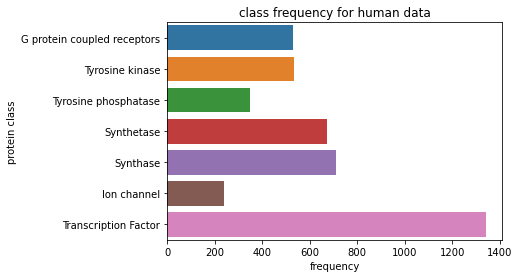

In [8]:
sns.barplot(x=human_data['class'].value_counts().sort_index(),y=labels)#plotting the barplot using seaborn
plt.title('class frequency for human data')
plt.xlabel('frequency')
plt.ylabel('protein class')
plt.show()

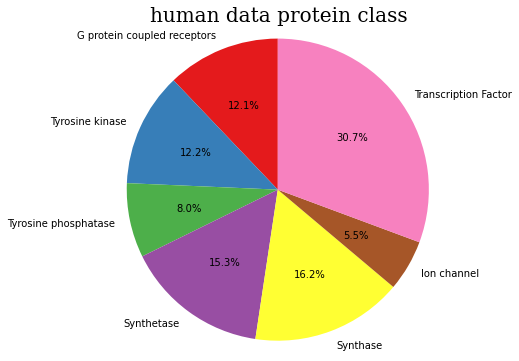

In [11]:
plt.figure(figsize=(6,6))
font_dict= font= {'family':'serif',
                 'color':'Black',
                 'weight':'normal',
                 'size': 20,}
a = np.random.random(7)
cs= cm.Set1(np.arange(7)/7.)
plt.pie(human_data['class'].value_counts().sort_index(),labels=labels,autopct='%1.1f%%',colors=cs,startangle=90)
plt.axis('equal')
plt.title('human data protein class',fontdict=font_dict)
plt.show()

In [12]:
chimp_data = pd.read_table('chimp_data.txt')
chimp_data.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


In [13]:
chimp_data.describe()

,class
count,1682.000000
mean,3.491082
std,2.177486
min,0.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,6.000000


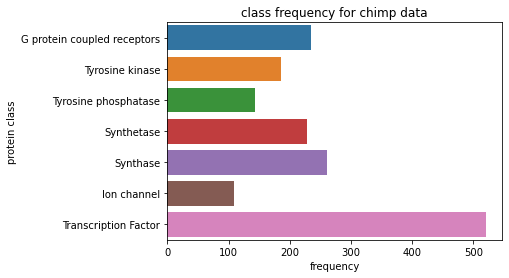

In [14]:
sns.barplot(x=chimp_data['class'].value_counts().sort_index(),y=labels)#plotting the barplot using seaborn
plt.title('class frequency for chimp data')
plt.xlabel('frequency')
plt.ylabel('protein class')
plt.show()

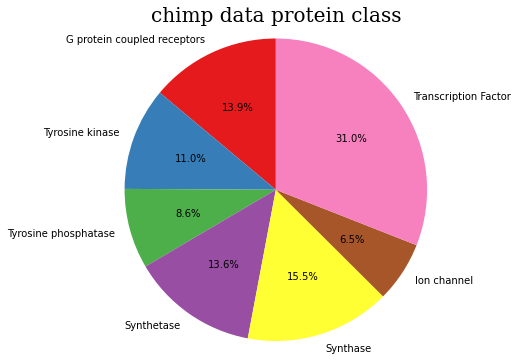

In [15]:
plt.figure(figsize=(6,6))
font_dict= font= {'family':'serif',
                 'color':'Black',
                 'weight':'normal',
                 'size': 20,}
a = np.random.random(7)
cs= cm.Set1(np.arange(7)/7.)
plt.pie(chimp_data['class'].value_counts().sort_index(),labels=labels,autopct='%1.1f%%',colors=cs,startangle=90)
plt.axis('equal')
plt.title('chimp data protein class',fontdict=font_dict)
plt.show()

# 3.Model Development

##  (a)-Human Data

In [19]:
#k-mers are subsequences of length k {\displaystyle k} k contained within a biological sequence. Primarily used 
# within the context of computational genomics and sequence analysis, in which k-mers are composed of nucleotides 
# (i.e. A, T, G, and C), k-mers are capitalized upon to assemble DNA sequences,[1] improve heterologous gene 
# expression,[2][3] identify species in metagenomic samples,[4] and create attenuated vaccines.[5] Usually, the 
# term k-mer refers to all of a sequence's subsequences of length k {\displaystyle k} k, such that the sequence 
# AGAT would have four monomers (A, G, A, and T), three 2-mers (AG, GA, AT), two 3-mers (AGA and GAT) and one 4-mer 
# (AGAT).

# function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]


cv = CountVectorizer(ngram_range=(4,4))

In [21]:
human_data['words'] = human_data.apply(lambda x: getKmers(x['sequence']),axis=1)
human_data = human_data.drop('sequence',axis=1)

In [22]:
human_texts = list(human_data['words'])
for item in range (len(human_data)):
    human_texts[item]=" ".join(human_texts[item])

In [23]:
X_human = cv.fit_transform(human_texts)
y_human = human_data['class']

In [26]:
print(X_human.shape,y_human.shape)

(4380, 232414) (4380,)


In [28]:
(human_texts[3])

'atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggcatt gcattt catttg atttgg tttggg ttgggc tgggcg gggcgc ggcgct gcgctg cgctgt gctgtt ctgttt tgtttg gtttgg tttggc ttggca tggcag ggcagt gcagtg cagtga agtgat gtgatg tgatga gatgat atgatt tgattg gattgc attgcc ttgcct tgcctt gccttt cctttc ctttct tttctg ttctgt tctgtt ctgttc tgttca gttcag ttcagt tcagtg cagtgt agtgtc gtgtct tgtctg gtctga tctgag ctgagt tgagtg gagtgc agtgct gtgcta tgctat gctatg ctatga tatgaa atgaag tgaaga gaagat aagatt agattg gattgc attgca ttgcac tgcaca gcacac cacaca acacag cacaga acagag cagagg agaggt gaggtc aggtcc ggtcca gtccag tccaga ccagat cagatg agatgc gatgca atgcat tgcatt gcattc cattcc attccg ttccgt tccgtt ccgttt cgtttt gttttg ttttga tttgag ttgaga tgagaa gagaat agaatg gaatgt aatgtc atgtca tgtcaa gtcaat tcaatg caatgg aatgga atggat tggata ggatac gataca atacac tacacc acacca caccaa accaac ccaact caactg aactgc actgct ctgctg tgctgc gctgct ctgctt tgcttt gctttg ctttgg tttgga ttggat tggatt ggattt gatttc atttca tttcac ttcacc tcaccg caccgg accgg

In [29]:
from sklearn.model_selection import train_test_split
X_train_human,X_test_human,y_train_human,y_test_human = train_test_split(X_human,y_human,test_size=0.25,random_state=42)

In [30]:
clf= DecisionTreeClassifier()
clf.fit(X_train_human,y_train_human)
dtree_preds = clf.predict(X_test_human)
print('accuracy for human data using Decision tree classifier:',accuracy_score(dtree_preds,y_test_human))

accuracy for human data using Decision tree classifier: 0.8


In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_human = RandomForestClassifier(n_estimators=400)
rf_human.fit(X_train_human,y_train_human)
rf_human_pred = rf_human.predict(X_test_human)
print('Accuracy for human data using RandomForest classifier: ',accuracy_score(rf_human_pred,y_test_human))


Accuracy for human data using RandomForest classifier:  0.9168949771689497


In [33]:
NB_human = MultinomialNB(alpha=0.1)
NB_human.fit(X_train_human,y_train_human)
y_pred_human = NB_human.predict(X_test_human)
nb_accuracy_human = accuracy_score(y_pred_human,y_test_human)
print("Accuracy for human data using Naive bayes classifier: ",nb_accuracy_human)

Accuracy for human data using Naive bayes classifier:  0.9780821917808219


<AxesSubplot:>

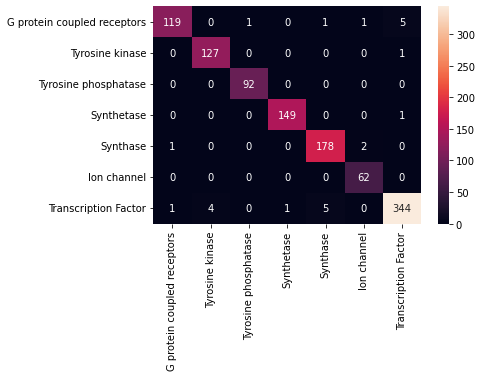

In [35]:
cm = confusion_matrix(y_pred_human,y_test_human)
sns.heatmap(cm,annot=True,xticklabels=labels,yticklabels=labels,fmt='g')

In [36]:
print(classification_report(y_pred_human,y_test_human))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       127
           1       0.97      0.99      0.98       128
           2       0.99      1.00      0.99        92
           3       0.99      0.99      0.99       150
           4       0.97      0.98      0.98       181
           5       0.95      1.00      0.98        62
           6       0.98      0.97      0.97       355

    accuracy                           0.98      1095
   macro avg       0.98      0.98      0.98      1095
weighted avg       0.98      0.98      0.98      1095



##  (b) - Chimpanzee data

In [37]:
chimp_data['words']= chimp_data.apply(lambda x: getKmers(x['sequence']),axis=1)
chimp_data = chimp_data.drop('sequence',axis=1)

In [38]:
chimp_texts = list(chimp_data['words'])
for item in range (len(chimp_texts)):
    chimp_texts[item] = " ". join(chimp_texts[item])

In [39]:
(chimp_texts[1])

'atgaac tgaacg gaacga aacgaa acgaaa cgaaaa gaaaat aaaatc aaatct aatcta atctat tctatt ctattc tattcg attcgc ttcgct tcgctt cgcttc gcttca cttcat ttcatt tcattc cattcg attcgc ttcgct tcgctg cgctgc gctgcc ctgccc tgcccc gccccc ccccca ccccac cccaca ccacaa cacaat acaatc caatcc aatcct atccta tcctag cctagg ctaggc taggct aggctt ggctta gcttac cttacc ttaccc tacccg acccgc cccgcc ccgccg cgccgc gccgca ccgcag cgcagt gcagta cagtac agtact gtacta tactaa actaat ctaatc taatca aatcat atcatt tcattc cattct attcta ttctat tctatt ctattc tattcc attccc ttcccc tccccc cccccc ccccct cccctc ccctct cctcta ctctac tctact ctactg tactgg actggt ctggtc tggtcc ggtccc gtcccc tcccca ccccac cccact ccactt cacttc acttct cttcta ttctaa tctaaa ctaaac taaaca aaacat aacatc acatct catctc atctca tctcat ctcatc tcatca catcaa atcaac tcaaca caacaa aacaac acaacc caaccg aaccga accgac ccgact cgacta gactaa actaat ctaatt taatta aattac attacc ttacca taccac accacc ccaccc caccca acccaa cccaac ccaaca caacaa aacaat acaatg caatga aatgac atgact tgacta gacta

In [40]:
X_chimp = cv.transform(chimp_texts)
y_chimp =  chimp_data['class']

In [41]:
print(X_chimp.shape,y_chimp.shape)

(1682, 232414) (1682,)


In [42]:
X_train_chimp,X_test_chimp,y_train_chimp,y_test_chimp = train_test_split(X_chimp,y_chimp,test_size=0.25,random_state=42)

In [43]:
clf= DecisionTreeClassifier()
clf.fit(X_train_chimp,y_train_chimp)
dtree_preds = clf.predict(X_test_chimp)
print('accuracy for chimp data using Decision tree classifier:',accuracy_score(dtree_preds,y_test_chimp))

accuracy for human data using Decision tree classifier: 0.7648456057007126


In [45]:
from sklearn.ensemble import RandomForestClassifier
rf_chimp = RandomForestClassifier(n_estimators=400)
rf_chimp.fit(X_train_chimp,y_train_chimp)
rf_chimp_pred = rf_human.predict(X_test_chimp)
print('Accuracy for chimp data using RandomForest classifier: ',accuracy_score(rf_chimp_pred,y_test_chimp))


Accuracy for chimp data using RandomForest classifier:  0.9738717339667459


In [46]:
NB_chimp = MultinomialNB(alpha=0.1)
NB_chimp.fit(X_train_chimp,y_train_chimp)
y_pred_chimp = NB_human.predict(X_test_chimp)
nb_accuracy_chimp = accuracy_score(y_pred_chimp,y_test_chimp)
print("Accuracy for human data using Naive bayes classifier: ",nb_accuracy_chimp)

Accuracy for human data using Naive bayes classifier:  0.9881235154394299


<AxesSubplot:>

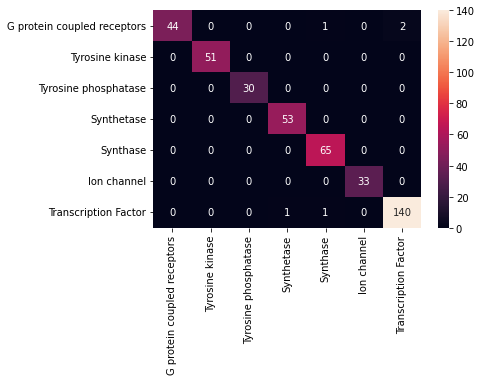

In [47]:
cm = confusion_matrix(y_pred_chimp,y_test_chimp)
sns.heatmap(cm,annot=True,xticklabels=labels,yticklabels=labels,fmt='g')

In [48]:
print(classification_report(y_pred_chimp,y_test_chimp))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        47
           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00        30
           3       0.98      1.00      0.99        53
           4       0.97      1.00      0.98        65
           5       1.00      1.00      1.00        33
           6       0.99      0.99      0.99       142

    accuracy                           0.99       421
   macro avg       0.99      0.99      0.99       421
weighted avg       0.99      0.99      0.99       421

